In [44]:
import pandas as pd 
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
'''
Finding movies similar to other movies
References
https://towardsdatascience.com/how-to-build-a-simple-recommender-system-in-python-375093c3fb7d
'''
#read in ratings csv file
ratings = pd.read_csv("ratings.csv")
#read in movie csv file
movies = pd.read_csv("movies.csv")

#Merge the two data sets on movieID
ratings = pd.merge(ratings, movies, on='movieId')

#get description of continuous data in ratings


In [45]:
#get overall average rating
averge_mean = ratings.rating.describe().iloc[[1]]
#averge_mean

In [54]:
#get the average rating for each movie and add to DF avg_rating
avg_rating = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
#Get count of ammount of votes per movie and add to DF
avg_rating['count_ratings'] = ratings.groupby('movieId')['rating'].count()
#avg_rating

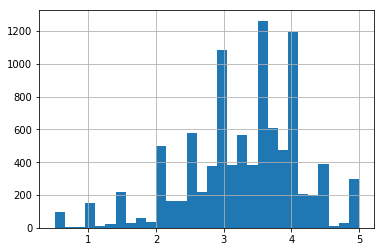

In [47]:
#histoogram to shows how many movies have what rating
%matplotlib inline
avg_rating['rating'].hist(bins=30)
#result -  most ratings between 2-4

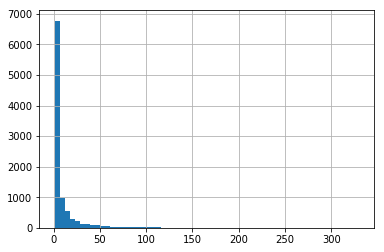

In [48]:
#histogram to show the amount of ratings each movie has
avg_rating['count_ratings'].hist(bins=60)
#result - most movies dont have a lot of ratings

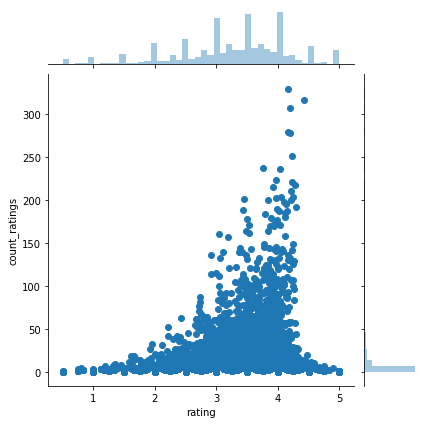

In [49]:
#ratings on x axis and the count on the y - plot a graph to see
#Higher average ratings, around 4, tend to have more ratings
sns.jointplot(x='rating', y='count_ratings', data=avg_rating)

In [25]:
#Get the top 10 ratings out of all movies
top_ten_rated = avg_rating.sort_values('rating', ascending=False).head(10)
#'''We can see that the top 10 rated movies all only have one or two ratings of 5 stars.
#So this only means one user enjoyed the movie - and it is not necessarely popular
#So instead get the top 10 rated movies
#'''
#top_ten_rated

In [28]:
#get top 10 most voted movies in the data set
ten_most_voted = avg_rating.sort_values('count_ratings', ascending=False).head(10)
#'''
#We can now see that the ammount of ratings is more
#More ratigns generally means a better movie- as it is more popular- so more people watch 
#and therefore vote for the movie
#We can see all movies are rated between 3.7 and 4.4 - all good ratings -all above average
#Below 2.5 is considered bad and above is good
#'''
#ten_most_voted

In [39]:
'''
So to get a better view on top voted with high ratings we can do the following
Get the top 100 most rated movies
Get the top rated out of the top 100 movies
'''
#TOP 10 MOVIES FOR FRONT PAGE
hundred_most_voted = avg_rating.sort_values('count_ratings', ascending=False).head(100)
top_10 = hundred_most_voted.sort_values('rating', ascending=False).head(10)
#top_10
top_10
top_10 = pd.merge(top_10, movies, on='movieId')
#top_10.to_csv("top_10.csv", sep=',')


top_10
links = pd.read_csv("links.csv")
links['tmdbId'] = links['tmdbId'].fillna(0.0).astype(int)

#Merge the two data sets on movieID and links
merged = pd.merge(links, top_10, on='movieId')
merged= merged.drop(columns='imdbId')
merged.to_csv("top_10.csv", sep=',', index = False)
#give to CSV to get top movies

In [50]:
'''
Simple item based recommender- must make matrix
Index = user ID. Columns = Movie titles 
Ratings will correspond movies with each user
NAN will be displayed for unrated movies
'''
#matrix of ratings
ratings_matrix = ratings.pivot_table(index='userId', columns='title', values='rating')
ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
#Get harry potter
Hp_user_rating = ratings_matrix['Harry Potter and the Chamber of Secrets (2002)']
'''
 corrwith = Compute pairwise correlation between rows or columns of two DataFrame objects 
 Higher the number - the more similar user ratings
'''

similar_to_hp = ratings_matrix.corrwith(Hp_user_rating)
similar_to_hp


title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                         -0.706632
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.428177
*batteries not included (1987)                                                       

In [55]:
'''
If we want to input any movie use this
a = input("Insert Movie")
Hp_user_rating = ratings_matrix[a]
'''
#Get rid of NULL values
#Find correlation
corr_hp = pd.DataFrame(similar_to_hp, columns=['Correlation'])
corr_hp.dropna(inplace=True)
#get rid of NULL values

'''
Add the count of all the ratings as 
'''
corr_hp = corr_hp.join(avg_rating['count_ratings'])
corr_hp

,Correlation,count_ratings
title,,
"'burbs, The (1989)",-0.706632,NaN
(500) Days of Summer (2009),0.428177,NaN
*batteries not included (1987),0.636364,NaN
10 Things I Hate About You (1999),0.343925,NaN
"10,000 BC (2008)",0.845432,NaN
101 Dalmatians (1996),-0.185767,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),0.118016,NaN
102 Dalmatians (2000),-0.149404,NaN
"10th Kingdom, The (2000)",1.000000,NaN


In [50]:
'''
For example if we have top 20 similar movies with ratings more then 1,
they are just a bunch of movies with max of 12 ratigns, 
that probably are not similar to HP just have user ratings in common
'''


#Top 10 similar movies with more than 1 rating
hp_similar1 = corr_hp[corr_hp['count_ratings'] > 1].sort_values(by='Correlation', ascending=False).head(10)
hp_similar1

,Correlation,count_ratings
title,,
Possession (2002),1.0,4
Together (Tillsammans) (2000),1.0,7
Coal Miner's Daughter (1980),1.0,3
Sophie Scholl: The Final Days (Sophie Scholl - Die letzten Tage) (2005),1.0,4
"Topo, El (1970)",1.0,5
Top Hat (1935),1.0,7
Kung Fu Panda 3 (2016),1.0,8
Next Stop Wonderland (1998),1.0,8
Tomb Raider (2018),1.0,4


In [51]:
'''
However, if we change it movies with more than 50 ratings, 
we can see that two other harry potter movies show up, 
(Number One being itself- which is definitly correct)
and the other one ddefinitly a similar movie
'''

#Top 10 similar movies with more than 50 ratings
hp_similar = corr_hp[corr_hp['count_ratings'] > 50].sort_values(by='Correlation', ascending=False).head(10)
hp_similar

,Correlation,count_ratings
title,,
Harry Potter and the Chamber of Secrets (2002),1.000000,102
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.884597,107
Harry Potter and the Order of the Phoenix (2007),0.825499,58
Harry Potter and the Half-Blood Prince (2009),0.692219,58
Harry Potter and the Goblet of Fire (2005),0.680157,71
Harry Potter and the Prisoner of Azkaban (2004),0.662563,93
Star Trek (2009),0.662398,59
Pretty Woman (1990),0.658711,135
28 Days Later (2002),0.655416,58
